<a href="https://colab.research.google.com/github/dxmolnar/EPL_Final_Standing_Forecaster/blob/main/EPL_Forecaster_Balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from pathlib import Path
import matplotlib.pyplot as plt
from google.colab import files
import sqlite3
import os
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from google.colab import drive

## Importing Data

In [ ]:
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
uploaded = files.upload()

Saving Team_Value_10_11.csv to Team_Value_10_11.csv
Saving Team_Value_11_12.csv to Team_Value_11_12.csv
Saving Team_Value_12_13.csv to Team_Value_12_13.csv
Saving Team_Value_13_14.csv to Team_Value_13_14.csv
Saving Team_Value_14_15.csv to Team_Value_14_15.csv
Saving Team_Value_15_16.csv to Team_Value_15_16.csv
Saving Team_Value_16_17.csv to Team_Value_16_17.csv
Saving Team_Value_17_18.csv to Team_Value_17_18.csv
Saving Team_Value_18_19.csv to Team_Value_18_19.csv
Saving Team_Value_19_20.csv to Team_Value_19_20.csv
Saving Team_Value_20_21.csv to Team_Value_20_21.csv
Saving Team_Value_21_22.csv to Team_Value_21_22.csv
Saving Team_Value_22_23.csv to Team_Value_22_23.csv


In [ ]:
import os
os.listdir()

['.config',
 'Team_Value_21_22.csv',
 'Team_Value_14_15.csv',
 'Team_Value_18_19.csv',
 'Team_Value_16_17.csv',
 'Team_Value_13_14.csv',
 'Team_Value_12_13.csv',
 'drive',
 'Team_Value_17_18.csv',
 'Team_Value_20_21.csv',
 'Team_Value_22_23.csv',
 'Team_Value_11_12.csv',
 'Team_Value_19_20.csv',
 'Team_Value_10_11.csv',
 'Team_Value_15_16.csv',
 'sample_data']

## Data Processing

In [ ]:
# List of file names for all the CSV files you want to read.
file_names = [
    'Team_Value_10_11.csv',
    'Team_Value_11_12.csv',
    'Team_Value_12_13.csv',
    'Team_Value_13_14.csv',
    'Team_Value_14_15.csv',
    'Team_Value_15_16.csv',
    'Team_Value_16_17.csv',
    'Team_Value_17_18.csv',
    'Team_Value_18_19.csv',
    'Team_Value_19_20.csv',
    'Team_Value_20_21.csv',
    'Team_Value_21_22.csv',
    'Team_Value_22_23.csv',
]

# Initialize an empty list to store DataFrames for each CSV file.
data_frames = []

# Loop through each file, read it as a DataFrame, and append it to the list.
for file_name in file_names:
    df = pd.read_csv(file_name)
    data_frames.append(df)

# Concatenate all DataFrames into one big DataFrame.
big_database = pd.concat(data_frames, ignore_index=True)

In [ ]:
# Print the first few rows of the DataFrame
print(big_database.head())

# Print the summary information about the DataFrame
print(big_database.info())

# Print the column names
print(big_database.columns)



                Team  Season  Final Position  Number of Players  Medium Age  \
0         Chelsea FC    2010               2               33.0        25.5   
1    Manchester City    2010               3               45.0        24.4   
2  Manchester United    2010               1               43.0        25.1   
3       Liverpool FC    2010               6               42.0        24.5   
4         Arsenal FC    2010               4               34.0        24.4   

   Foreigners Medium Market Value Total Market Value  
0          23              12.85m             424.1m  
1          28               8.98m            404.18m  
2          29               9.02m               388m  
3          25               8.08m             339.2m  
4          27               9.53m               324m  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               -------------- 

In [ ]:
big_database.drop(columns=big_database.columns[big_database.columns.str.startswith('Unnamed')], inplace=True)


In [ ]:
print(big_database)


                  Team  Season  Final Position  Number of Players  Medium Age  \
0           Chelsea FC    2010               2               33.0        25.5   
1      Manchester City    2010               3               45.0        24.4   
2    Manchester United    2010               1               43.0        25.1   
3         Liverpool FC    2010               6               42.0        24.5   
4           Arsenal FC    2010               4               34.0        24.4   
..                 ...     ...             ...                ...         ...   
255       Brentford FC    2022               9               36.0        24.8   
256       Leeds United    2022              19               47.0        23.5   
257     Crystal Palace    2022              11               39.0        24.9   
258          Fulham FC    2022              10               47.0        25.3   
259    AFC Bournemouth    2022              15               47.0        24.4   

     Foreigners Medium Mark

In [ ]:
big_database.drop(columns=["Number of Players", "Medium Age", "Foreigners", "Medium Market Value"])

,Team,Season,Final Position,Total Market Value
0,Chelsea FC,2010,2,424.1m
1,Manchester City,2010,3,404.18m
2,Manchester United,2010,1,388m
3,Liverpool FC,2010,6,339.2m
4,Arsenal FC,2010,4,324m
...,...,...,...,...
255,Brentford FC,2022,9,371.20m
256,Leeds United,2022,19,345.15m
257,Crystal Palace,2022,11,323.05m
258,Fulham FC,2022,10,295.25m


In [ ]:
big_database = big_database.set_index('Season')
print(big_database.head())

                     Team  Final Position  Number of Players  Medium Age  \
Season                                                                     
2010           Chelsea FC               2               33.0        25.5   
2010      Manchester City               3               45.0        24.4   
2010    Manchester United               1               43.0        25.1   
2010         Liverpool FC               6               42.0        24.5   
2010           Arsenal FC               4               34.0        24.4   

        Foreigners Medium Market Value Total Market Value  
Season                                                     
2010            23              12.85m             424.1m  
2010            28               8.98m            404.18m  
2010            29               9.02m               388m  
2010            25               8.08m             339.2m  
2010            27               9.53m               324m  


In [ ]:
print(big_database['Team'].value_counts())


NameError: ignored

In [ ]:
first_place_teams = df[df['Team'] == 1]
print(first_place_teams)

Empty DataFrame
Columns: [Team, Season, Final Position, Number of Players, Medium Age, Foreigners, Medium Market Value, Total Market Value]
Index: []


In [ ]:
print(df['Team'].describe())


count                  20
unique                 20
top       Manchester City
freq                    1
Name: Team, dtype: object


In [ ]:
# Convert 'Total Market Value' column to numeric
def convert_market_value(value):
    if 'bn' in value:
        return float(value.replace('€', '').replace('bn', '')) * 1000  # Convert billion to million
    elif 'm' in value:
        return float(value.replace('€', '').replace('m', ''))
    else:
        raise ValueError("Invalid format in 'Total Market Value' column")

big_database['Total Market Value'] = big_database['Total Market Value'].apply(convert_market_value)


In [ ]:
team_with_highest_value = big_database.loc[big_database.groupby('Season')['Total Market Value'].idxmax()]


In [ ]:
big_database.reset_index(inplace=True)


In [ ]:
team_with_highest_value = big_database.loc[big_database.groupby('Season')['Total Market Value'].idxmax()]


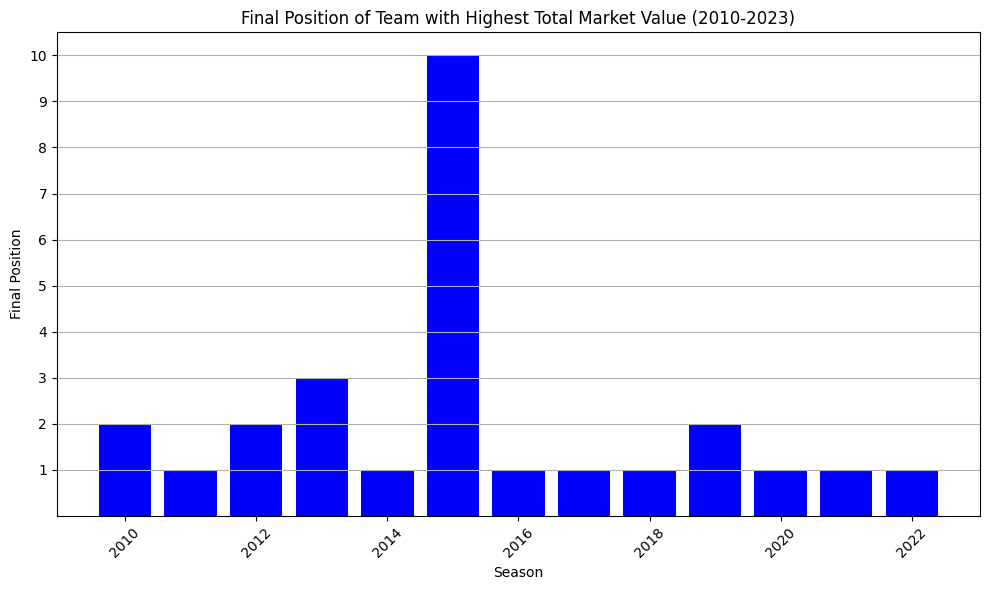

In [ ]:
# Create a bar plot to show the final position of the team with the highest "Total Market Value" for each season
plt.figure(figsize=(10, 6))
plt.bar(team_with_highest_value['Season'], team_with_highest_value['Final Position'], color='b')
plt.title('Final Position of Team with Highest Total Market Value (2010-2023)')
plt.xlabel('Season')
plt.ylabel('Final Position')
plt.xticks(rotation=45)
plt.yticks(range(1, 11))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
team_with_lowest_value = big_database.loc[big_database.groupby('Season')['Total Market Value'].idxmin()]


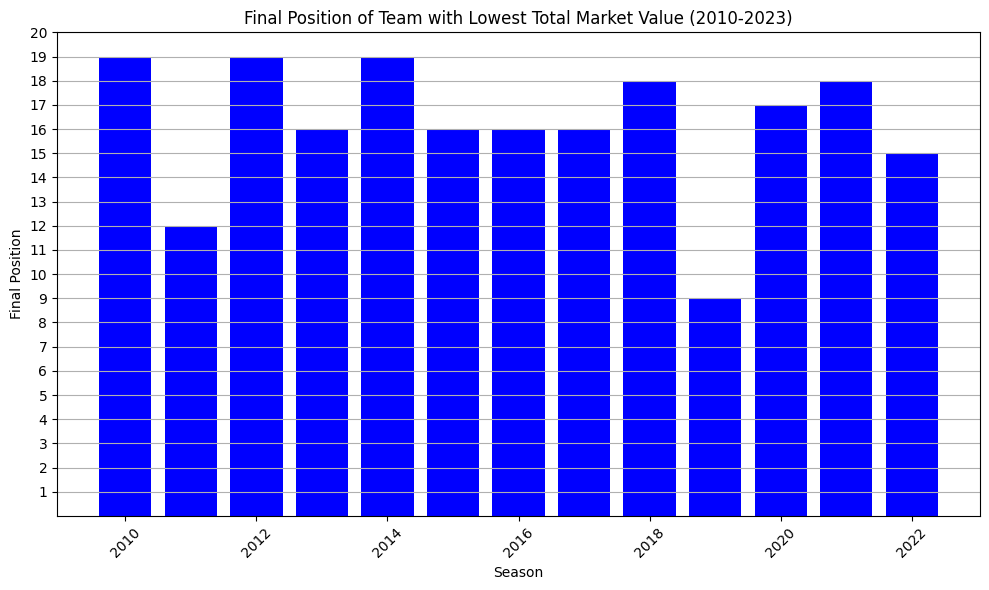

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(team_with_lowest_value['Season'], team_with_lowest_value['Final Position'], color='b')
plt.title('Final Position of Team with Lowest Total Market Value (2010-2023)')
plt.xlabel('Season')
plt.ylabel('Final Position')
plt.xticks(rotation=45)

# Set y-axis ticks to show positions from 1 to 20 with one-year increments
plt.yticks(range(1, 21))

plt.grid(axis='y')
plt.tight_layout()
plt.show()
# With this modification, the y-axis will have ticks at positions 1, 2, 3, ..., 20, corresponding to the final positions of the teams. The x-axis labels will still be rotated for better readability.

# Training the Machine Learning Model
---
### Balanced Random Forest Classifier




In [ ]:
# Split target column from dataset
y = big_database['Final Position']
X = big_database.drop(columns='Final Position')

In [ ]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Count distinct values
y_train.value_counts()

13    12
3     12
1     12
2     11
20    11
4     11
9     11
6     11
18    10
16    10
14    10
7      9
12     9
10     9
8      9
5      9
17     8
19     8
11     7
15     6
Name: Final Position, dtype: int64

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Transform the testing data using the fitted imputer
X_test_scaled_imputed = imputer.transform(X_test_scaled)

In [ ]:
# Instantiate a BalancedRandomForestClassifier instance
brf = BalancedRandomForestClassifier(random_state=1)

# Fit the model to the training data
brf.fit(X_train_scaled_imputed, y_train)

# Make predictions on the test data
y_pred = brf.predict(X_test_scaled_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

In [ ]:
# Predict labels for testing features
y_pred = brf.predict(X_test_scaled_imputed)

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.14      0.25      0.18         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.50      0.33      0.40         6
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         5
          18       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Final_Position = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
               '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

In [ ]:
report = classification_report(y_test, y_pred, target_names=Final_Position, output_dict=True)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Convert the classification report to a DataFrame

report_df = pd.DataFrame(report).transpose()


<Figure size 1000x600 with 0 Axes>

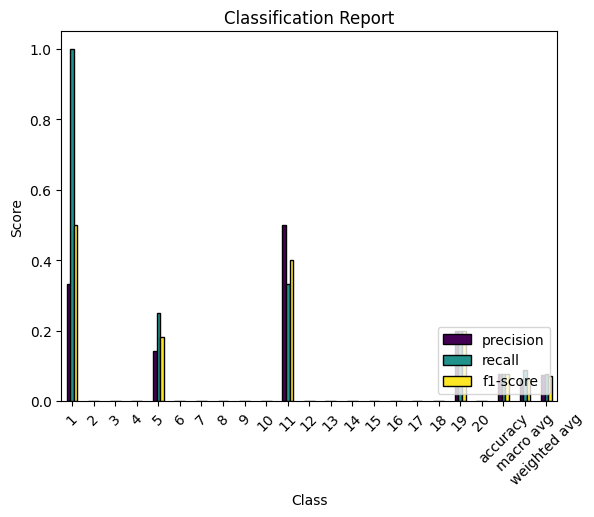

In [ ]:
# Plot the precision, recall, and F1-score for each class
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='viridis', edgecolor='black')
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

## Using Medium Market Value Instead of Total Market Value to Train the Model


In [ ]:
new_target_values = ["Team", "Final Position", "Medium Market Value"]
big_database_new = big_database[new_target_values].copy()



In [ ]:
# Split target column from dataset
y = big_database_new['Final Position']
X = big_database_new.drop(columns='Final Position')

In [ ]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Count distinct values
y_train.value_counts()

13    12
3     12
1     12
2     11
20    11
4     11
9     11
6     11
18    10
16    10
14    10
7      9
12     9
10     9
8      9
5      9
17     8
19     8
11     7
15     6
Name: Final Position, dtype: int64

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Instantiate a BalancedRandomForestClassifier instance
brf = BalancedRandomForestClassifier(random_state=1)

# Fit the model to the training data
brf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = brf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

In [ ]:
# Predict labels for testing features
y_pred = brf.predict(X_test)

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.17      0.25      0.20         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         5
          18       0.25    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Final_Position = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
               '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

In [ ]:
report = classification_report(y_test, y_pred, target_names=Final_Position, output_dict=True)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report_df = pd.DataFrame(report).transpose()


<Figure size 1000x600 with 0 Axes>

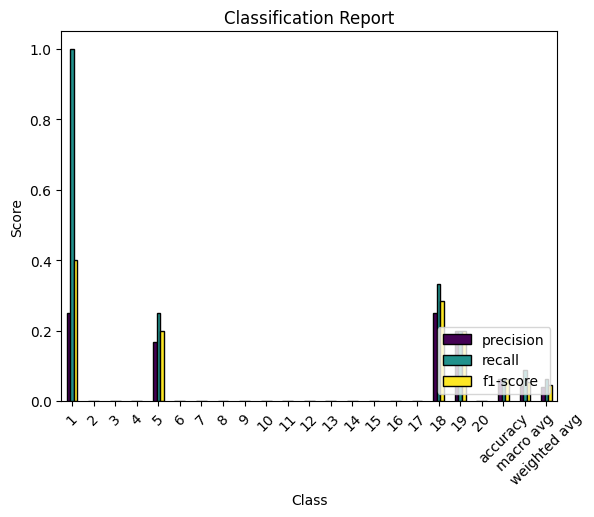

In [ ]:
# Plot the precision, recall, and F1-score for each class
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='viridis', edgecolor='black')
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

## Predicting Future Table


In [ ]:
uploaded_pred = files.upload()

Saving Team_Value_23_24.csv to Team_Value_23_24 (1).csv


In [ ]:
file_name = 'Team_Value_23_24.csv'
team_data = pd.read_csv(file_name)

In [ ]:
label_encoder = LabelEncoder()
team_data['Team'] = label_encoder.fit_transform(team_data['Team'])
team_data['Season'] = label_encoder.fit_transform(team_data['Season'])



In [ ]:
# Convert 'Total Market Value' column to numeric
def convert_market_value(value):
    try:
        if 'bn' in value:
            return float(value.replace('€', '').replace('bn', '')) * 1000  # Convert billion to million
        elif 'm' in value:
            return float(value.replace('€', '').replace('m', ''))
        elif '€' in value:
            return float(value.replace('€', ''))
        else:
            # Handle unexpected or invalid formats gracefully
            return float('nan')  # Return NaN for invalid formats
    except:
        # Handle any other exceptions gracefully
        return float('nan')

team_data['Total Market Value'] = team_data['Total Market Value'].apply(convert_market_value)


In [ ]:
print(team_data['Total Market Value'].unique())


[1210.   1160.    879.5   847.1   836.8   773.3   588.5   575.8   464.9
  393.8   365.15  362.9   358.18  335.48  299.45  272.5   264.    193.85
  104.5    59.  ]


In [ ]:
# List of columns to remove
columns_to_remove = ["Foreigners", "Medium Age", "Number of Players", "Season", "Total Market Value"]

# Drop the specified columns from team_data
team_data = team_data.drop(columns=columns_to_remove)


In [ ]:
team_predictions = brf.predict(team_data)


ValueError: ignored

In [ ]:
# Filter rows with known labels (exclude 'unknown')
y_train_filtered = y_train[y_train != 'unknown']
X_train_filtered = X_train[y_train != 'unknown']



In [ ]:
# Convert y_train to string format
y_train_filtered= y_train_filtered.astype(str).str.lower()

# Filter rows with known labels (exclude 'unknown' and strip white spaces)
y_train_filtered = y_train_filtered.str.strip()[y_train_filtered.str.strip() != 'unknown']
X_train_filtered = X_train[y_train_str.str.strip() != 'unknown']


In [ ]:
y_train_flattened = y_train_filtered.values.ravel()


In [ ]:
# Split the data into training and testing sets
X_train_filtered, X_test, y_train_flattened, y_test = train_test_split(X, y, random_state=1)

# Train the model
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train_filtered, y_train_flattened)

# Create a DataFrame with desired total market value percentiles (without extended features)
percentile = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Use the trained model to predict probability estimates for the desired percentiles
predicted_probs = brf.predict_proba(X_test)

# Define the position ranges
position_ranges = [(1, 3), (4, 6), (7, 10), (11, 15), (16, 20)]

# Print the probability results
for i, (percentile, probs) in enumerate(zip(desired_percentiles, predicted_probs)):
    position_probs = [(pos, prob) for pos, prob in zip(brf.classes_, probs)]
    position_probs.sort(key=lambda x: x[1], reverse=True)
    print(f"Teams in the {percentile*100:.0f}th percentile have the following probabilities:")
    for pos_range in position_ranges:
        total_prob = sum(prob for pos, prob in position_probs if pos_range[0] <= pos <= pos_range[1])
        print(f"   - To finish in positions {pos_range[0]}-{pos_range[1]}: {total_prob*100:.0f}%")
    print()

ValueError: ignored

In [ ]:
print(y_train_filtered.unique())


[13 11 19 1 6 7 2 18 4 12 5 17 20 3 15 10 8 16 14 9]


## Adding Additional Features

1.   Medium Age
2.   Number of Foreigners



In [ ]:
X_additional_features = big_database[['Medium Age', 'Foreigners']]


In [ ]:
X = pd.concat([X, X_additional_features], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create the model
model = BalancedRandomForestClassifier(random_state=1)

# Train the model
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
# Create an imputer object with the chosen strategy (e.g., mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the data
X_train_imputed = imputer.fit_transform(X_train)

# Use the same imputer to transform the test data
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Drop rows with missing values from both X_train and y_train
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train.index]

# Drop rows with missing values from X_test
X_test_dropped = X_test.dropna()


In [ ]:
# Create the model
model = BalancedRandomForestClassifier(random_state=1)

# Train the model using the imputed or dropped data
model.fit(X_train_imputed, y_train_dropped)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))


ValueError: ignored

## Making Predictions Based on Percentile Ranking of Each Team

In [ ]:
# Calculate the percentile of 'Total Market Value' for each team
big_database['Total Market Value Percentile'] = big_database['Total Market Value'].rank(pct=True)


In [ ]:
# Define the features (X) and the target variable (y)
X = big_database[['Total Market Value Percentile']]
y = big_database['Final Position']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!apt install --upgrade scikit-learn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package scikit-learn


In [ ]:
from sklearn.ensemble import BalancedRandomForestClassifier

# Create and train the model
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)


ImportError: ignored

In [ ]:
# Create and train the model
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

BalancedRandomForestClassifier(random_state=42)

In [ ]:
y_pred = brf.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.33      0.33      0.33         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.33      0.33      0.33         3
           8       0.33      0.17      0.22         6
           9       0.33      0.33      0.33         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.50      0.33      0.40         3
          16       1.00      0.14      0.25         7
          17       0.00      0.00      0.00         4
          18       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

## Predicting Probability Based on Extended Feature Sets

In [ ]:
# Create a DataFrame with desired total market value percentiles
desired_percentiles = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
desired_data = pd.DataFrame({'Total Market Value Percentile': desired_percentiles})

# Use the trained model to predict probability estimates for the desired percentiles
predicted_probs = predicted_probs = brf.predict_proba(desired_data)

# Define the position ranges
position_ranges = [(1, 3), (4, 6), (7, 10), (11, 15), (16, 20)]

# Print the probability results
for i, (percentile, probs) in enumerate(zip(desired_percentiles, predicted_probs)):
    position_probs = [(pos, prob) for pos, prob in zip(brf.classes_, probs)]
    position_probs.sort(key=lambda x: x[1], reverse=True)
    print(f"Teams in the {percentile*100:.0f}th percentile have the following probabilities:")
    for pos_range in position_ranges:
        total_prob = sum(prob for pos, prob in position_probs if pos_range[0] <= pos <= pos_range[1])
        print(f"   - To finish in positions {pos_range[0]}-{pos_range[1]}: {total_prob*100:.0f}%")
    print()

Teams in the 90th percentile have the following probabilities:
   - To finish in positions 1-3: 14%
   - To finish in positions 4-6: 85%
   - To finish in positions 7-10: 1%
   - To finish in positions 11-15: 0%
   - To finish in positions 16-20: 0%

Teams in the 80th percentile have the following probabilities:
   - To finish in positions 1-3: 45%
   - To finish in positions 4-6: 29%
   - To finish in positions 7-10: 15%
   - To finish in positions 11-15: 7%
   - To finish in positions 16-20: 4%

Teams in the 70th percentile have the following probabilities:
   - To finish in positions 1-3: 31%
   - To finish in positions 4-6: 15%
   - To finish in positions 7-10: 51%
   - To finish in positions 11-15: 0%
   - To finish in positions 16-20: 3%

Teams in the 60th percentile have the following probabilities:
   - To finish in positions 1-3: 0%
   - To finish in positions 4-6: 35%
   - To finish in positions 7-10: 7%
   - To finish in positions 11-15: 32%
   - To finish in positions 16-20

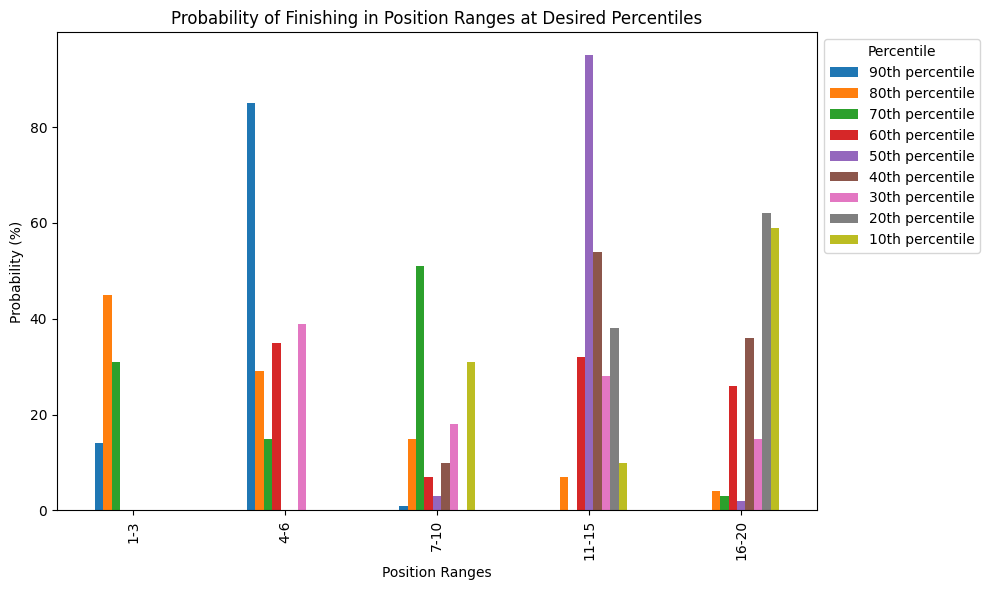

In [ ]:
# ... (your existing code)

# Collect the probability results
results = {}
for i, (percentile, probs) in enumerate(zip(desired_percentiles, predicted_probs)):
    position_probs = [(pos, prob) for pos, prob in zip(brf.classes_, probs)]
    position_probs.sort(key=lambda x: x[1], reverse=True)
    percentiles_results = {}
    for pos_range in position_ranges:
        total_prob = sum(prob for pos, prob in position_probs if pos_range[0] <= pos <= pos_range[1])
        percentiles_results[f"{pos_range[0]}-{pos_range[1]}"] = total_prob * 100
    results[f"{percentile*100:.0f}th percentile"] = percentiles_results

# Convert the results dictionary to a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Plot the bar chart
ax = results_df.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel("Position Ranges")
ax.set_ylabel("Probability (%)")
ax.set_title("Probability of Finishing in Position Ranges at Desired Percentiles")

plt.legend(title="Percentile", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
big_database

,Season,Team,Final Position,Number of Players,Medium Age,Foreigners,Medium Market Value,Total Market Value,Total Market Value Percentile
0,0,11,2,33.0,25.5,23,€12.85m,424.10,0.730769
1,0,20,3,45.0,24.4,28,€8.98m,404.18,0.707692
2,0,21,1,43.0,25.1,29,€9.02m,388.00,0.696154
3,0,19,6,42.0,24.5,25,€8.08m,339.20,0.646154
4,0,1,4,34.0,24.4,27,€9.53m,324.00,0.634615
...,...,...,...,...,...,...,...,...,...
255,12,7,9,36.0,24.8,26,€10.31m,371.20,0.665385
256,12,17,19,47.0,23.5,29,€7.34m,345.15,0.650000
257,12,12,11,39.0,24.9,19,€8.28m,323.05,0.626923
258,12,14,10,47.0,25.3,33,€6.28m,295.25,0.561538


In [ ]:
# Assuming your data is in a DataFrame called 'big_database'
X = big_database.drop('Total Market Value', axis=1)
y = big_database['Total Market Value']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Assuming df is your DataFrame and '2013/14' is the name of the column
# We'll use the pandas get_dummies() function for one-hot encoding

# Step 1: Create one-hot encoded columns
one_hot_encoded = pd.get_dummies(big_database['2013/14'], prefix='Season')

# Step 2: Concatenate the one-hot encoded columns back to the original DataFrame
big_database = pd.concat([df, one_hot_encoded], axis=1)

# Step 3: Drop the original '2013/14' column if needed
big_database.drop(columns=['2013/14'], inplace=True)

# Now your DataFrame 'df' will have new binary columns representing each season, e.g., 'season_2013' and 'season_2014'.


KeyError: ignored

In [ ]:
# For classification tasks
#gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# For regression tasks
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gb_model.fit(X_train, y_train)


ValueError: ignored

## Predicting the 2023/24 Season Based on the Balanced Random Forest Model


In [ ]:
uploaded_pred = files.upload()

Saving Team_Value_23_24.csv to Team_Value_23_24 (2).csv


In [ ]:
file_name = 'Team_Value_23_24.csv'
team_data = pd.read_csv(file_name)

In [ ]:
label_encoder = LabelEncoder()
team_data['Team'] = label_encoder.fit_transform(team_data['Team'])
team_data['Season'] = label_encoder.fit_transform(team_data['Season'])



In [ ]:
# Convert 'Total Market Value' column to numeric
def convert_market_value(value):
    try:
        if 'bn' in value:
            return float(value.replace('€', '').replace('bn', '')) * 1000  # Convert billion to million
        elif 'm' in value:
            return float(value.replace('€', '').replace('m', ''))
        elif '€' in value:
            return float(value.replace('€', ''))
        else:
            # Handle unexpected or invalid formats gracefully
            return float('nan')  # Return NaN for invalid formats
    except:
        # Handle any other exceptions gracefully
        return float('nan')

team_data['Total Market Value'] = team_data['Total Market Value'].apply(convert_market_value)


In [ ]:
print(team_data['Total Market Value'].unique())


[1210.   1160.    879.5   847.1   836.8   773.3   588.5   575.8   464.9
  393.8   365.15  362.9   358.18  335.48  299.45  272.5   264.    193.85
  104.5    59.  ]


In [ ]:
# Get the common features between X_train and team_data
common_features = set(X_train.columns).intersection(set(team_data.columns))

# Filter team_data to only include the common features
team_data_filtered = team_data[common_features]

# Make predictions using the filtered team_data
team_predictions = brf.predict(team_data_filtered)


<ipython-input-124-8209fe11a30b>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  team_data_filtered = team_data[common_features]


ValueError: ignored

In [ ]:
team_predictions = brf.predict(team_data)


ValueError: ignored